Consider the n-dimensional linear system of ordinary differential equations:
$$x'(t)=A(t)x(t)$$
where in addition, the matrix $A(t)$ is periodic with period $T$, i.e. $A(t+T)=A(t)$ for all real values of $t$.
Let $Φ(t)$ denote the principal fundamental matrix solution such that the columns
of $Φ(t)$ are linearly independent, and $Φ(0)=I$. Then, Floquet's theorem decomposes the principal
fundamental matrix as the product of a periodic matrix $P(t)$ with period $T$ and an exponential matrix $e^{tB}$.



In [1]:
using ApproxFun

In [14]:
function Base.expm{T<:Number}(A::Matrix{T},f::Fun)
    D,V = eig(A)
    fC = D == real(D) ? fill(f,n) : fill(f+0im,n)
    for i = 1:length(D)
        fC[i] = Fun(t->exp(D[i]*fC[i](t)),domain(f))
    end
    V*diagm(fC)*inv(V)
end;

Consider the system of coupled harmonic oscillators with periodic parameterized excitation:
     $$x'' + (1+a \cos(2t))x = x-y$$
     $$y'' + (1+a \cos(2t))y = y-x$$
We calculate the Principal Fundamental Matrix $Φ$.

In [3]:
T = π;a=0.15
t = Fun(identity,[0,T])
d=domain(t)
D=Derivative(d)
B=ldirichlet(d)
n=4
A=[ diagm(fill(ldirichlet(d),n));
    D             -I  0I            0I;
   (2+a*cos(2t))   D  -I            0I;
   0I             0I   D            -I;
   -I             0I  (2+a*cos(2t))  D]

Φ = A\eye(n);

It can be further expressed as $Φ(t) = P(t) e^{tB}$ where $P(t)$ is a periodic matrix, and $B$ is constant.
Using the values of $Φ(T)$:

In [6]:
ΦT = Φ(T)

4x4 Array{Float64,2}:
 -0.170879  -0.148885  -0.836059   0.265569
  0.732284  -0.170879  -0.612945  -0.836059
 -0.836059   0.265569  -0.170879  -0.148885
 -0.612945  -0.836059   0.732284  -0.170879

we calculate the matrix $B$ and the Floquet exponents and multipliers.

In [8]:
logm([1 2;3 4])

2x2 Array{Complex{Float64},2}:
 -0.35044+2.39112im  0.929351-1.09376im 
  1.39403-1.64064im   1.04359+0.750475im

In [9]:
B = logm(ΦT)/T
D,V = eig(B)

println("Floquet Exponents = \n")
[println(D[i]) for i=1:n]
println("\nFloquet Multipliers = \n")
[println(exp(D[i]*T)) for i=1:n];

Floquet Exponents = 

-1.1102230246251565e-16 - 0.2683546905319044im
-2.3597660284147004e-16 + 0.2683546905319047im
0.037475319732289486 + 0.999999999999999im
-0.037475319732289014 + 1.0000000000000002im

Floquet Multipliers = 

0.6651802570066624 - 0.7466828146465874im
0.6651802570066614 + 0.7466828146465876im
-1.1249427991479377 + 3.634790471420916e-15im
-0.8889340869219561 - 6.806690441197218e-16im


We can build the matrix exponential $e^{-tB}$ and use it to find the periodic matrix $P(t)$.
Periodicity is numerically confirmed by Fun instantiation with low lengths.

In [15]:
PI = Φ*expm(B,-t)
P = Fun(t->PI(t),PeriodicInterval(d))
P|>length

208

With the matrix B and the periodic matrix P(t), we can construct 
the solution with any initial conditions for as long as we want!

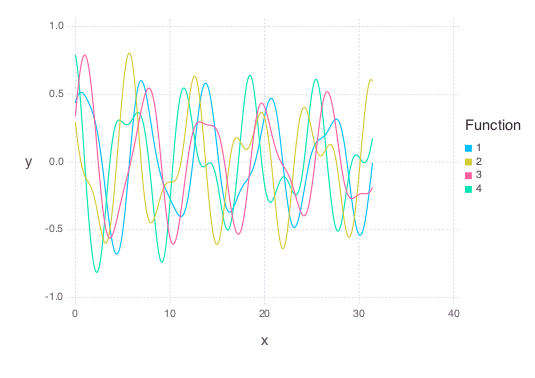

In [16]:
t = Fun(identity,[0,10T])
d = domain(t)
x0 = rand(n)

PI = Fun(t->P(t),d)
xsol = real(PI*expm(B,t)*x0)

ApproxFun.plot(mat(xsol))